In [21]:
import numpy as np
from scipy.ndimage import gaussian_filter, map_coordinates

def preprocess_image(image, x_step, y_step, z_step, smoothing_um=10.0):
    """
    Pre-smooth the 3D image with a Gaussian filter using a physical smoothing scale.
    """
    # Convert smoothing scale in micrometers to voxel units
    sigma_x = (smoothing_um / x_step) / 2.355
    sigma_y = (smoothing_um / y_step) / 2.355
    sigma_z = (smoothing_um / z_step) / 2.355
    
    # Apply Gaussian filter
    smoothed = gaussian_filter(image, sigma=(sigma_z, sigma_y, sigma_x))
    return smoothed

def get_intensity(smoothed_image, z, x, y):
    """
    Given a smoothed image and physical coordinates (x, y, z) in pixles, return the interpolated intensity.
    return the interpolated intensity from the smoothed image.
    
    Assumes the image is indexed as [z, y, x].
    """
    if type(x)==int:
        coords = [[z], [y], [x]]
    else:
        coords = [z, y, x]
        
    intensity = map_coordinates(smoothed_image, coords, order=1, mode='nearest')
    return intensity[0]

In [3]:
# Load the 3D image
from tifffile import imread

stack = imread('/mnt/nasquatch/data/2p/jonna/EASI_FISH/pipeline/CIM131/HCR/C4-CIM131_HCR01_Chrimson_Oren.tif')

x_step, y_step, z_step = 0.1, 0.1, 3.0  # in micrometers
smoothing_um = 10.0

# Pre-smooth the image
smoothed_image = preprocess_image(stack, x_step, y_step, z_step, smoothing_um)

In [22]:
get_intensity(smoothed_image,10,1050,1000)


5

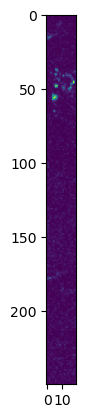

In [19]:
import matplotlib.pyplot as plt
plt.imshow(stack[10,1000:1250,1000:1020])